In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
#加载数据集
iris = datasets.load_iris()
X = iris.data[:,2:4]
y = iris.target

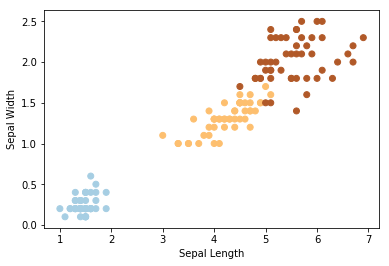

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=666)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
print('训练集准确率:%.2f%%'%(train_acc*100))
print('测试集准确率:%.2f%%'%(test_acc*100))

训练集准确率:97.14%
测试集准确率:100.00%


In [29]:
def plot_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0]-0.2,axis[1]+0.2,int((axis[1]-axis[0])*100)),
        np.linspace(axis[2]-0.2,axis[3]+0.2,int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

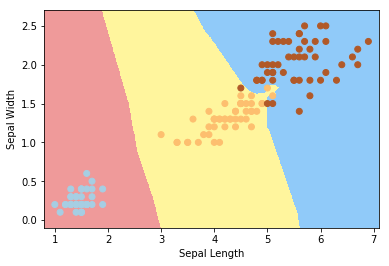

In [30]:
min_1,max_1 = X[:,0].min(),X[:,0].max()
min_2,max_2 = X[:,1].min(),X[:,1].max()
plot_boundary(knn,axis=[min_1,max_1, min_2,max_2])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
clf_train_pred = clf.predict(X_train)
clf_test_pred = clf.predict(X_test)


clf_train_acc = accuracy_score(y_train,clf_train_pred)
clf_test_acc = accuracy_score(y_test,clf_test_pred)
print('训练集准确率:%.2f%%'%(clf_train_acc*100))
print('测试集准确率:%.2f%%'%(clf_test_acc*100))

训练集准确率:94.29%
测试集准确率:100.00%


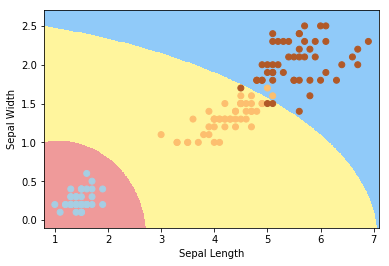

In [32]:
min_1,max_1 = X[:,0].min(),X[:,0].max()
min_2,max_2 = X[:,1].min(),X[:,1].max()
plot_boundary(clf,axis=[min_1,max_1, min_2,max_2])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()